<a href="https://colab.research.google.com/github/aravind-2599/datascience/blob/main/Sentiment_analysis_classification_using_imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


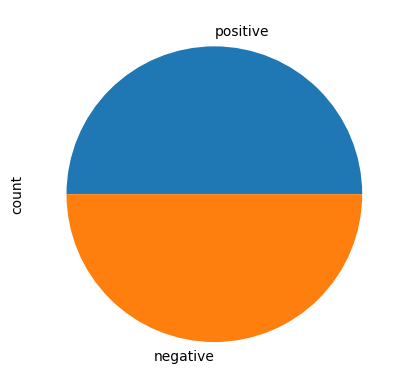

In [8]:
df['sentiment'].value_counts().plot(kind="pie")
plt.show()

## Splitting the dataset

In [9]:
#train dataset

train_reviews = df['review'][:40000]
train_sentiments = df['sentiment'][:40000]

#test dataset

test_reviews = df['review'][40000:]
test_sentiments = df['sentiment'][40000:]
print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape, test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


## Text normalization

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
tokenizer = ToktokTokenizer()

stoppword_list = nltk.corpus.stopwords.words('english')

### Removing html strips and noise text

In [13]:
import re, string, unicodedata

In [14]:
#removing html strips

def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

#removing the square brackets

def remove_inbetween_sqr_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

#removing the noisy_text

def denoise_text(text):
  text = strip_html(text)
  text = remove_inbetween_sqr_brackets(text)
  return text

df['review'] = df['review'].apply(denoise_text)

<ipython-input-14-492460c26998>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [15]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### removing special characters

In [16]:
def remove_special_characters(text, remove_digit=True):
  pattern = r'[^a-zA-Z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

df['review'] = df['review'].apply(remove_special_characters)

### Text Stemming

In [17]:
def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

df['review'] = df['review'].apply(simple_stemmer)

In [18]:
norm_train_reviews  = df['review'][:40000]
norm_train_reviews[0]

'one of the other review ha mention that after watch just 1 oz episod youll be hook they are right as thi is exactli what happen with meth first thing that struck me about oz wa it brutal and unflinch scene of violenc which set in right from the word go trust me thi is not a show for the faint heart or timid thi show pull no punch with regard to drug sex or violenc it is hardcor in the classic use of the wordit is call oz as that is the nicknam given to the oswald maximum secur state penitentari it focus mainli on emerald citi an experiment section of the prison where all the cell have glass front and face inward so privaci is not high on the agenda em citi is home to manyaryan muslim gangsta latino christian italian irish and moreso scuffl death stare dodgi deal and shadi agreement are never far awayi would say the main appeal of the show is due to the fact that it goe where other show wouldnt dare forget pretti pictur paint for mainstream audienc forget charm forget romanceoz doesnt 

In [20]:
norm_test_reviews = df['review'][40000:]
norm_test_reviews[45005]

'i read all the review here after watch thi piec of cinemat garbag and it took me at least 2 page to find out that somebodi els didnt think that thi appallingli unfunni montag wasnt the acm of humour in the 70 or inde in ani other era if thi isnt the least funni set of sketch comedi ive ever seen itll do till it come along half of the skit had alreadi been done and infinit better by act such as monti python and woodi allen if i wa to say that a nice piec of anim that last about 90 second is the highlight of thi film it would still not get close to sum up just how mindless and drivelridden thi wast of 75 minut is semin comedi onli in the world where semin realli doe mean semen scatolog humour onli in a world where scat is actual fece precursor joke onli if by that we mean that thi is a handbook of how not to do comedi tit and bum and the odd beaver niceif you are a pubesc boy with at least one hand free and havent found out that playboy exist give it a break becaus it wa the earli 70 no

### Bag of words model

In [21]:
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

cv_train_reviews = cv.fit_transform(norm_train_reviews)

cv_test_reviews = cv.fit_transform(norm_test_reviews)

print('BOW_cv_train', cv_train_reviews.shape)
print('BOW_cv_test', cv_test_reviews.shape)


BOW_cv_train (40000, 6029507)
BOW_cv_test (10000, 1946822)


Term-Frequency Inverse Document frequency

In [23]:
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

tv_train_reviews = tv.fit_transform(norm_train_reviews)

tv_test_reviews = tv.fit_transform(norm_test_reviews)
print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)


Tfidf_train: (40000, 6029507)
Tfidf_test: (10000, 1946822)


### Labelling the sentiment text

In [24]:
lb = LabelBinarizer()

In [26]:
sentiment_data = lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(50000, 1)


### Split the sentiment data

In [27]:
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]


### Training the Data

### Logistic regression

In [28]:
lr = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=42, verbose=3, max_iter=300)

lr_bow = lr.fit(cv_train_reviews, train_sentiments)
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print(lr_tfidf)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(cv=5, max_iter=300, random_state=42, scoring='accuracy',
                     verbose=3)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(cv=5, max_iter=300, random_state=42, scoring='accuracy',
                     verbose=3)


In [29]:
lr_bow_pred = lr.predict(cv_test_reviews)
print(classification_report( lr_bow_pred))

lr_tfidf_pred = lr.predict(tv_test_reviews)
print(classification_report(lr_tfidf_pred))

ValueError: X has 1946822 features, but LogisticRegressionCV is expecting 6029507 features as input.